### Data Cleaning
- drop unneccesary columns. 
- drop rows/instances with missing values
- rename columns with spaces 

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.ExcelFile('loopnetlistingswithbrokers.xlsx')
df = df.parse('Sheet1')

In [4]:
df.head(n = 2)

url                Address  \
0  http://www.loopnet.com/Listing/20157634/6060-E...  Anchorage, AK 99518 ·   
1  http://www.loopnet.com/Listing/18499430/1901-A...  Fairbanks, AK 99701 ·   

                                      City              Owner Name  \
0  6060 Electron Dr., Anchorage, AK, 99518  ODEX INVESTMENTS V LLC   
1   1901 Airport Way, Fairbanks, AK, 99701  SEATTLE SC PLAZA 2 LLC   

                                     Mailing Address        Price  \
0           1001 4TH AVE STE 4500, SEATTLE, WA 98154  $10,239,431   
1  1331 N CALIFORNIA BLVD STE 170, WALNUT CREEK, ...   $4,050,000   

  Number of Units Total area Number Of Stories    Lot Size    Type Year Built  \
0                                               680,276 SF    Land              
1                  10,000 SF                 1     3.26 AC  Office       2006   

                                          Other Info  \
0  Hard to find large I-2 site located near the c...   
1  Assessor's Parcel Number 0394921 *Sale include...   

                                              Images         broker  \
0  http://x.lnimg.com/photo/poster_1920/cf0cb4964...   Greg Johnson   
1  http://x.lnimg.com/photo/poster_1920/881647c1b...  Pamela Throop   

              phone                       EMAIL secondary broker phone, 2  \
0  tel:+19075635500  gregory.c.johnson@noaa.gov              NaN      NaN   
1  tel:+19074566008     realty@realtyalaska.com              NaN      NaN   

  Email  
0   NaN  
1   NaN

In [5]:
df.drop(['url','City','Owner Name','Mailing Address','Other Info','Images','phone','EMAIL','phone, 2','Email'], axis=1, inplace=True)

In [6]:
df.drop(['Number of Units'], axis=1, inplace=True)

In [7]:
df = df[df.Type != ' ']

In [8]:
df = df.rename(columns={'Total area': 'tot_area', 'Number Of Stories': 'num_stories','Lot Size': 'lot_size',
                   'Year Built': 'year','secondary broker': 'broker2'})

In [9]:
df[df['Price'].str.contains("-")]['Type'].unique() #check to see how many rows have have missing value

array(['Land', 'Office', 'Agricultural', 'Industrial'], dtype=object)

In [10]:
#look into these missing values. is the missingness due to some bias or random?
print("Land :", round(len(df[df['Price'].str.contains("-")][df['Type'].str.contains("Land")])/len(df.loc[df.Type == 'Land',:])*100,2),"%")
print("Office :", round(len(df[df['Price'].str.contains("-")][df['Type'].str.contains("Office")])/len(df.loc[df.Type == 'Office',:])*100,2),"%")
print("Agricultural :", round(len(df[df['Price'].str.contains("-")][df['Type'].str.contains("Agricultural")])/len(df.loc[df.Type == 'Agricultural',:])*100,2),"%")
print("Industrial :", round(len(df[df['Price'].str.contains("-")][df['Type'].str.contains("Industrial")])/len(df.loc[df.Type == 'Industrial',:])*100,2),"%")

Land : 9.72 %
Office : 1.7 %
Agricultural : 2.63 %
Industrial : 0.34 %


In [11]:
#almost 10% of land is missing but we will drop these missing values
df = df[~(df['Price'].str.contains("-"))]

In [12]:
df2 = pd.read_csv("demographics_movoto_test.csv")

In [13]:
#rename columns
df2 = df2.rename(columns={'zip_code': 'emp_oth', 'bif1': 'edu_HS','bif2': 'emp_agr', 'bif3': 'emp_info', 
                        'bif4': 'med_hh_size', 'bif5': 'tp_oth', 'bif6':'hh_size_1', 'Grad_ed': 'inc_75to150', 
                        'HS_Ed':'yr90', 'lessHS_ed':'emp_ret', 'BA_ed': 'age25_39', 'pop_ed': 'age18_24',
                        'p1': 'rec_home_sold', 'p2':'br5','p3':'br1', 'p4':'owner', 'p5': 'emp_manu', 
                        'p6': 'yr50under', 'c1':'tp_pub','c2':'age_40_64','c3':'hh_for_sale','c4':'age_9under',
                        'c5':'rent_600under','c6':'br0','c7':'tp_taxi','c8':'status_nlf','c9':'status_unemp',
                        'c10':'tp_wb','c11':'inc_30under','c12':'inc_30to75','m1':'rent_600_1k','m2':'edu_ba',
                        'm3':'br4','m4':'inc_150over','m5':'emp_cons','m6':'renter','emp1':'yr50_89',
                        'emp2':'rent_1500_2k','emp3':'emp_pub','emp4':'age_10_17','inc1':'address','inc2':'room1',
                        'inc3':'rent_1k_1.5k','inc4':'edu_lessHS','hh1':'emp_edu', 'hh2':'room7_8','hh3':'room4_6',
                        'hh4':'hh_size_6over','nr1':'hh_size_4to5','nr2':'room9over','nr3':'emp_trans','nr4':'edu_grad',
                        'nr5':'med_list_price','nbr1':'emp_prof','nbr2':'age_65over','nbr3':'emp_fin','nbr4':'emp_art',
                        'nbr5':'rent_2k_over','nbr6':'tp_priv','bu1': 'tp_wfh','bu2':'schools','bu3':'br3',
                        'rvo1':'status_eciv','rvo2':'med_dolSF','rent1':'hh_size_2to3','rent2':'pop_edu',
                        'rent3':'room2_3','rent4':'status_earm','rent5':'br2'})

In [14]:
#checkpoint 1 (we save above in new files)
df.to_csv('loopnet.csv')
df2.to_csv('zipcode_demographics.csv')

In [15]:
#reload df2 and drop 1st column (otherwise we will have duplicate index)
df2 = pd.read_csv("zipcode_demographics.csv")
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
#removing the paranthesis in %'s
df2['emp_oth'] = df2['emp_oth'].str[1:]
df2['edu_HS'] = df2['edu_HS'].str[1:]
df2['emp_agr'] = df2['emp_agr'].str[1:]
df2['emp_info'] = df2['emp_info'].str[1:]
df2['tp_oth'] = df2['tp_oth'].str[1:]
df2['hh_size_1'] = df2['hh_size_1'].str[1:]
df2['inc_75to150'] = df2['inc_75to150'].str[1:]
df2['yr90'] = df2['yr90'].str[1:]
df2['emp_ret'] = df2['emp_ret'].str[1:]
df2['age25_39'] = df2['age25_39'].str[1:]
df2['age18_24'] = df2['age18_24'].str[1:]
df2['br5'] = df2['br5'].str[1:]
df2['br1'] = df2['br1'].str[1:]
df2['owner'] = df2['owner'].str[1:]
df2['emp_manu'] = df2['emp_manu'].str[1:]
df2['yr50under'] = df2['yr50under'].str[1:]
df2['tp_pub'] = df2['tp_pub'].str[1:]
df2['age_40_64'] = df2['age_40_64'].str[1:]
df2['age_9under'] = df2['age_9under'].str[1:]
df2['rent_600under'] = df2['rent_600under'].str[1:]
df2['br0'] = df2['br0'].str[1:]
df2['tp_taxi'] = df2['tp_taxi'].str[1:]
df2['status_nlf'] = df2['status_nlf'].str[1:]
df2['status_unemp'] = df2['status_unemp'].str[1:]
df2['tp_wb'] = df2['tp_wb'].str[1:]
df2['inc_30under'] = df2['inc_30under'].str[1:]
df2['inc_30to75'] = df2['inc_30to75'].str[1:]
df2['rent_600_1k'] = df2['rent_600_1k'].str[1:]
df2['edu_ba'] = df2['edu_ba'].str[1:]
df2['br4'] = df2['br4'].str[1:]
df2['inc_150over'] = df2['inc_150over'].str[1:]
df2['emp_cons'] = df2['emp_cons'].str[1:]
df2['renter'] = df2['renter'].str[1:]
df2['yr50_89'] = df2['yr50_89'].str[1:]
df2['rent_1500_2k'] = df2['rent_1500_2k'].str[1:]
df2['edu_lessHS'] = df2['edu_lessHS'].str[1:]
df2['room7_8'] = df2['room7_8'].str[1:]
df2['room4_6'] = df2['room4_6'].str[1:]
df2['hh_size_6over'] = df2['hh_size_6over'].str[1:]
df2['hh_size_4to5'] = df2['hh_size_4to5'].str[1:]
df2['room9over'] = df2['room9over'].str[1:]
df2['emp_trans'] = df2['emp_trans'].str[1:]
df2['edu_grad'] = df2['edu_grad'].str[1:]
df2['emp_prof'] = df2['emp_prof'].str[1:]
df2['age_65over'] = df2['age_65over'].str[1:]
df2['emp_fin'] = df2['emp_fin'].str[1:]
df2['emp_art'] = df2['emp_art'].str[1:]
df2['rent_2k_over'] = df2['rent_2k_over'].str[1:]
df2['tp_priv'] = df2['tp_priv'].str[1:]
df2['tp_wfh'] = df2['tp_wfh'].str[1:]
df2['br3'] = df2['br3'].str[1:]
df2['status_eciv'] = df2['status_eciv'].str[1:]
df2['med_dolSF'] = df2['med_dolSF'].str[1:]
df2['hh_size_2to3'] = df2['hh_size_2to3'].str[1:]
df2['room2_3'] = df2['room2_3'].str[1:]
df2['status_earm'] = df2['status_earm'].str[1:]
df2['br2'] = df2['br2'].str[1:]
df2['emp_pub'] = df2['emp_pub'].str[1:]
df2['age_10_17'] = df2['age_10_17'].str[1:]
df2['room1'] = df2['room1'].str[1:]
df2['rent_1k_1.5k'] = df2['rent_1k_1.5k'].str[1:]
df2['emp_edu'] = df2['emp_edu'].str[1:]

df2['emp_oth'] = df2['emp_oth'].str[:-1]
df2['edu_HS'] = df2['edu_HS'].str[:-1]
df2['emp_agr'] = df2['emp_agr'].str[:-1]
df2['emp_info'] = df2['emp_info'].str[:-1]
df2['tp_oth'] = df2['tp_oth'].str[:-1]
df2['hh_size_1'] = df2['hh_size_1'].str[:-1]
df2['inc_75to150'] = df2['inc_75to150'].str[:-1]
df2['yr90'] = df2['yr90'].str[:-1]
df2['emp_ret'] = df2['emp_ret'].str[:-1]
df2['age25_39'] = df2['age25_39'].str[:-1]
df2['age18_24'] = df2['age18_24'].str[:-1]
df2['br5'] = df2['br5'].str[:-1]
df2['br1'] = df2['br1'].str[:-1]
df2['owner'] = df2['owner'].str[:-1]
df2['emp_manu'] = df2['emp_manu'].str[:-1]
df2['yr50under'] = df2['yr50under'].str[:-1]
df2['tp_pub'] = df2['tp_pub'].str[:-1]
df2['age_40_64'] = df2['age_40_64'].str[:-1]
df2['age_9under'] = df2['age_9under'].str[:-1]
df2['rent_600under'] = df2['rent_600under'].str[:-1]
df2['br0'] = df2['br0'].str[:-1]
df2['tp_taxi'] = df2['tp_taxi'].str[:-1]
df2['status_nlf'] = df2['status_nlf'].str[:-1]
df2['status_unemp'] = df2['status_unemp'].str[:-1]
df2['tp_wb'] = df2['tp_wb'].str[:-1]
df2['inc_30under'] = df2['inc_30under'].str[:-1]
df2['inc_30to75'] = df2['inc_30to75'].str[:-1]
df2['rent_600_1k'] = df2['rent_600_1k'].str[:-1]
df2['edu_ba'] = df2['edu_ba'].str[:-1]
df2['br4'] = df2['br4'].str[:-1]
df2['inc_150over'] = df2['inc_150over'].str[:-1]
df2['emp_cons'] = df2['emp_cons'].str[:-1]
df2['renter'] = df2['renter'].str[:-1]
df2['yr50_89'] = df2['yr50_89'].str[:-1]
df2['rent_1500_2k'] = df2['rent_1500_2k'].str[:-1]
df2['edu_lessHS'] = df2['edu_lessHS'].str[:-1]
df2['room7_8'] = df2['room7_8'].str[:-1]
df2['room4_6'] = df2['room4_6'].str[:-1]
df2['hh_size_6over'] = df2['hh_size_6over'].str[:-1]
df2['hh_size_4to5'] = df2['hh_size_4to5'].str[:-1]
df2['room9over'] = df2['room9over'].str[:-1]
df2['emp_trans'] = df2['emp_trans'].str[:-1]
df2['edu_grad'] = df2['edu_grad'].str[:-1]
df2['emp_prof'] = df2['emp_prof'].str[:-1]
df2['age_65over'] = df2['age_65over'].str[:-1]
df2['emp_fin'] = df2['emp_fin'].str[:-1]
df2['emp_art'] = df2['emp_art'].str[:-1]
df2['rent_2k_over'] = df2['rent_2k_over'].str[:-1]
df2['tp_priv'] = df2['tp_priv'].str[:-1]
df2['tp_wfh'] = df2['tp_wfh'].str[:-1]
df2['br3'] = df2['br3'].str[:-1]
df2['status_eciv'] = df2['status_eciv'].str[:-1]
df2['med_dolSF'] = df2['med_dolSF'].str[:-1]
df2['hh_size_2to3'] = df2['hh_size_2to3'].str[:-1]
df2['room2_3'] = df2['room2_3'].str[:-1]
df2['status_earm'] = df2['status_earm'].str[:-1]
df2['br2'] = df2['br2'].str[:-1]
df2['emp_pub'] = df2['emp_pub'].str[:-1]
df2['age_10_17'] = df2['age_10_17'].str[:-1]
df2['room1'] = df2['room1'].str[:-1]
df2['rent_1k_1.5k'] = df2['rent_1k_1.5k'].str[:-1]
df2['emp_edu'] = df2['emp_edu'].str[:-1]

In [17]:
df2.head(n=3)

emp_oth edu_HS emp_agr emp_info med_hh_size tp_oth hh_size_1 inc_75to150  \
0    2.3%  55.4%    4.3%     1.9%       1,474     2%     30.8%       41.2%   
1      4%  57.4%    1.8%       1%       1,547   1.7%     35.8%       26.2%   
2    4.3%    54%      3%     2.6%       1,750   3.5%     21.4%       36.7%   

    yr90 emp_ret age25_39 age18_24  rec_home_sold   br5    br1  owner  \
0  24.7%   11.9%    26.8%    10.7%            4.0  2.2%   5.5%  64.4%   
1  15.5%   17.8%    26.4%      14%            0.0  1.8%  20.7%  42.4%   
2  25.2%   13.7%    24.9%     9.1%            3.0  5.8%   5.5%  64.4%   

  emp_manu yr50under tp_pub age_40_64 hh_for_sale age_9under rent_600under  \
0     1.7%      0.5%   1.1%     32.7%          44      11.8%          3.3%   
1     0.7%        9%   1.8%     26.9%          19      13.9%         10.4%   
2     1.6%      0.9%   1.4%     31.3%         125      16.2%          4.7%   

    br0 tp_taxi status_nlf status_unemp tp_wb inc_30under inc_30to75  \
0  1.3%    0.1%      20.7%         5.3%  3.3%        8.8%      36.4%   
1  5.3%    0.8%      29.8%         7.4%    6%         26%      40.5%   
2  0.2%    0.2%        24%         4.5%  2.5%       13.7%      30.9%   

  rent_600_1k edu_ba    br4 inc_150over emp_cons renter yr50_89 rent_1500_2k  \
0       30.6%  31.6%   9.6%       13.6%     8.5%  35.6%   74.8%        22.7%   
1       46.5%  24.4%  11.9%        7.3%     5.9%  57.6%   75.5%        11.9%   
2         19%  29.1%  18.9%       18.8%       8%  35.6%   73.9%         8.1%   

  emp_pub age_10_17               address room1 rent_1k_1.5k edu_lessHS  \
0    9.2%      9.6%  Anchorage, AK, 99518  0.9%        42.4%       5.9%   
1    8.1%      9.5%  Fairbanks, AK, 99701  4.8%        27.9%      11.4%   
2    9.8%      9.2%  Anchorage, AK, 99502  0.2%        63.7%       5.3%   

  emp_edu room7_8 room4_6 hh_size_6over hh_size_4to5 room9over emp_trans  \
0   20.3%   13.1%   68.6%          4.6%        15.7%        5%     10.8%   
1   22.9%   11.7%   50.5%          3.5%        15.4%      4.5%        8%   
2   20.8%   25.2%   53.6%          3.2%        17.5%     11.5%     10.1%   

  edu_grad med_list_price emp_prof age_65over emp_fin emp_art rent_2k_over  \
0     7.1%       $247,500    12.1%       8.5%    6.5%   10.6%         0.9%   
1     6.8%       $189,900     9.5%       9.3%    4.1%   16.1%         3.3%   
2    11.6%       $339,900    12.8%       9.2%    5.5%    7.7%         4.4%   

  tp_priv tp_wfh schools    br3 status_eciv med_dolSF hh_size_2to3  pop_edu  \
0   91.9%   1.5%       5  42.8%       73.6%        16        48.9%   6985.0   
1   87.1%   2.7%      23  27.8%         57%        11        45.3%  11828.0   
2   89.7%   2.7%       6  37.7%       70.7%        17        57.9%  15494.0   

  room2_3 status_earm    br2  
0   12.3%        0.4%  38.6%  
1   28.5%        5.8%  32.6%  
2    9.6%        0.9%  31.9%

In [18]:
#checkpoint 2 
df2.to_csv('zipcode_demographics2.csv')#reload dataframe

In [156]:
df2 = pd.read_csv("zipcode_demographics2.csv")
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [157]:
#find empty rows, save as table (reference to check these zip codes later) and delete these rows (59 rows)
missing_df = df2[df2['emp_oth'].isnull()]

In [158]:
#remove null values
df2 = df2[df2['emp_oth'].notnull()]
df2 = df2[df2['hh_size_1'].notnull()]
df2 = df2[df2['hh_for_sale'].notnull()]
df2[df2.isnull() == True]

emp_oth edu_HS emp_agr emp_info med_hh_size tp_oth hh_size_1 inc_75to150  \
0        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
1        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
2        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
3        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
4        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
5        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
7        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
8        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
9        NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
10       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
11       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
12       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
13       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
14       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
15       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
16       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
17       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
18       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
19       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
20       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
21       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
22       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
23       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
24       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
25       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
26       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
27       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
28       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
29       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
30       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
31       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
32       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
33       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
34       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
35       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
36       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
37       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
38       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
39       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
40       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
41       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
42       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
43       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
44       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
45       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
46       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
47       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
48       NaN    NaN     NaN      NaN         NaN    NaN       NaN         NaN   
49       NaN    NaN     NaN      NaN

In [159]:
#create zip codes in df and df2 (to join on)
df2['zip_code']= df2['address'].str[-5:]
df['zip_code'] = df['Address'].str[-7:].str[:5]

In [160]:
df3 = pd.merge(df,df2,on='zip_code',how='left')
df3.head()

Address        Price   tot_area num_stories    lot_size  \
0  Anchorage, AK 99518 ·  $10,239,431                         680,276 SF   
1  Fairbanks, AK 99701 ·   $4,050,000  10,000 SF           1     3.26 AC   
2  Anchorage, AK 99502 ·   $3,500,000  28,521 SF                 1.09 AC   
3    Wasilla, AK 99654 ·   $3,267,000                              25 AC   
4  Anchorage, AK 99504 ·   $5,000,000                      1   81,893 SF   

     Type  year              broker broker2 zip_code emp_oth edu_HS emp_agr  \
0    Land              Greg Johnson     NaN    99518    2.3%  55.4%    4.3%   
1  Office  2006       Pamela Throop     NaN    99701      4%  57.4%    1.8%   
2  Office              Vern Flowers     NaN    99502    4.3%    54%      3%   
3    Land        Carl D. Kuhn, CCIM     NaN    99654      5%  63.7%    5.8%   
4  Retail  1978          Doosan Bak     NaN    99504    4.4%  55.3%    1.7%   

  emp_info med_hh_size tp_oth hh_size_1 inc_75to150   yr90 emp_ret age25_39  \
0     1.9%       1,474     2%     30.8%       41.2%  24.7%   11.9%    26.8%   
1       1%       1,547   1.7%     35.8%       26.2%  15.5%   17.8%    26.4%   
2     2.6%       1,750   3.5%     21.4%       36.7%  25.2%   13.7%    24.9%   
3     2.5%       2,031   7.2%     20.1%       36.9%  56.3%   12.8%    20.9%   
4     1.9%       1,492   1.8%     22.7%         37%  24.1%   13.9%    22.5%   

  age18_24  rec_home_sold   br5    br1  owner emp_manu yr50under tp_pub  \
0    10.7%            4.0  2.2%   5.5%  64.4%     1.7%      0.5%   1.1%   
1      14%            0.0  1.8%  20.7%  42.4%     0.7%        9%   1.8%   
2     9.1%            3.0  5.8%   5.5%  64.4%     1.6%      0.9%   1.4%   
3     9.6%            4.0  4.6%   9.3%  74.4%     3.1%      0.7%   1.2%   
4    11.8%            0.0  2.2%   6.3%  64.4%     1.7%      0.4%   2.4%   

  age_40_64 hh_for_sale age_9under rent_600under   br0 tp_taxi status_nlf  \
0     32.7%          44      11.8%          3.3%  1.3%    0.1%      20.7%   
1     26.9%          19      13.9%         10.4%  5.3%    0.8%      29.8%   
2     31.3%         125      16.2%          4.7%  0.2%    0.2%        24%   
3     32.7%         303      15.5%         10.1%  3.1%      0%      35.7%   
4     31.2%         189        15%         10.5%  0.3%      0%      25.8%   

  status_unemp tp_wb inc_30under inc_30to75 rent_600_1k edu_ba    br4  \
0         5.3%  3.3%        8.8%      36.4%       30.6%  31.6%   9.6%   
1         7.4%    6%         26%      40.5%       46.5%  24.4%  11.9%   
2         4.5%  2.5%       13.7%      30.9%         19%  29.1%  18.9%   
3         6.4%  1.7%       18.2%      31.9%       43.2%  22.5%    17%   
4         4.9%  1.2%       15.6%      32.8%       25.1%  26.8%  16.3%   

  inc_150over emp_cons renter yr50_89 rent_1500_2k emp_pub age_10_17  \
0       13.6%     8.5%  35.6%   74.8%        22.7%    9.2%      9.6%   
1        7.3%     5.9%  57.6%   75.5%        11.9%    8.1%      9.5%   
2       18.8%       8%  35.6%   73.9%         8.1%    9.8%      9.2%   
3         13%      13%  25.6%     43%        11.7%    9.3%     13.2%   
4       14.6%     6.2%  35.6%   75.5%        18.9%   10.6%     10.9%   

                address room1 rent_1k_1.5k edu_lessHS emp_edu room7_8 room4_6  \
0  Anchorage, AK, 99518  0.9%        42.4%       5.9%   20.3%   13.1%   68.6%   
1  Fairbanks, AK, 99701  4.8%        27.9%      11.4%   22.9%   11.7%   50.5%   
2  Anchorage, AK, 99502  0.2%        63.7%       5.3%   20.8%   25.2%   53.6%   
3    Wasilla, AK, 99654    3%        33.5%         8%   22.5%   17.8%   54.9%   
4  Anchorage, AK, 99504  0.3%        43.3%         7%   24.5%   18.4%   65.1%   

  hh_size_6over hh_size_4to5 room9over emp_trans edu_grad med_list_price  \
0          4.6%        15.7%        5%     10.8%     7.1%       $247,500   
1          3.5%        15.4%      4.5%        8%     6.8%       $189,900   
2          3.2%        17.5%     11.5%     10.1%    11.6%       $339,900   
3          5.8%        22.2%     

In [161]:
#remove instances without price
df3 = df3[~(df3['Price'].str.contains("Lot"))]
df3 = df3[~(df3['Price'].str.contains("Unit"))]
df3 = df3[~(df3['Price'].str.contains("North"))]
df3 = df3[~(df3['Price'].str.contains("Over"))]

In [162]:
#could not convert string to float: '—' :remove these from dataframe
#df3 = df3[~(df3['med_hh_size'].str.contains("—"))]
#df3 = df3[~(df3['hh_for_sale'].str.contains("—"))]
#df3.dtypes # almost everything is object/cateogircal. we need to convert this to float. 
df3[~(df3['Price'].str.contains("—"))]

Address          Price    tot_area num_stories  \
0             Anchorage, AK 99518 ·    $10,239,431                           
1             Fairbanks, AK 99701 ·     $4,050,000   10,000 SF           1   
2             Anchorage, AK 99502 ·     $3,500,000   28,521 SF               
3               Wasilla, AK 99654 ·     $3,267,000                           
4             Anchorage, AK 99504 ·     $5,000,000                       1   
5           Eagle River, AK 99577 ·     $3,300,000   35,962 SF               
6           Prudhoe Bay, AK 99734 ·    $16,000,000   91,191 SF               
7             Anchorage, AK 99508 ·     $5,500,000   37,193 SF               
8           Eagle River, AK 99577 ·     $3,400,000   24,519 SF               
9                Palmer, AK 99645 ·     $4,500,000   59,240 SF           1   
10            Anchorage, AK 99507 ·     $4,980,000   28,000 SF           2   
11            Anchorage, AK 99508 ·     $4,400,000   11,900 SF           2   
12            Fairbanks, AK 99701 ·     $3,500,000   34,092 SF               
13              Wasilla, AK 99654 ·     $5,920,000                           
14              Wasilla, AK 99654 ·     $5,200,000   25,026 SF               
15            Anchorage, AK 99501 ·     $6,500,000   41,000 SF               
16            Anchorage, AK 99503 ·     $8,200,000   79,438 SF               
17       Delta Junction, AK 99737 ·     $7,200,000                           
18             Gustavus, AK 99826 ·     $3,000,000   15,000 SF           2   
19              Wasilla, AK 99654 ·    $12,500,000                           
20             Soldotna, AK 99669 ·    $11,340,000   17,250 SF           1   
21            Anchorage, AK 99501 ·    $16,275,285   76,600 SF           7   
22            Anchorage, AK 99501 ·     $4,250,000   34,931 SF           2   
23          Prudhoe Bay, AK 99734 ·    $16,000,000   91,191 SF               
24            Anchorage, AK 99501 ·     $5,600,000   77,000 SF               
25                Kenai, AK 99611 ·     $4,200,000  111,348 SF               
26            Anchorage, AK 99507 ·    $11,364,000   14,418 SF           1   
27            Anchorage, AK 99501 ·     $6,200,000   39,284 SF               
28               Athens, AL 35611 ·     $4,500,000                           
29           Montgomery, AL 36105 ·     $7,175,000                           
30             Florence, AL 35630 ·     $3,315,000    5,753 SF           1   
31           Birmingham, AL 35242 ·     $5,500,000                           
32           Montgomery, AL 36108 ·     $8,750,000                           
33               Mobile, AL 36617 ·     $3,800,000                       1   
34               Tanner, AL 35671 ·    $15,514,000  327,600 SF           1   
35               Mobile, AL 36606 ·     $4,965,840                           
36             Homewood, AL 35209 ·     $7,400,000  142,040 SF               
37               Mobile, AL 36606 ·     $3,267,000                           
38           Huntsville, AL 35671 ·    $11,934,700  252,000 SF               
39             Saraland, AL 36571 ·     $3,990,000   30,000 SF           3   
40                Comer, AL 36053 ·     $5,172,000                           
41          Phenix City, AL 36869 ·     $6,550,376   47,287 SF               
42           Birmingham, AL 35203 ·     $3,750,000   46,565 SF               
43             Theodore, AL 36582 ·     $4,239,912                           
44           Huntsville, AL 35802 ·    $24,600,000                      13   
45           Birmingham, AL 35211 ·     $3,500,000   48,000 SF           1   
46           Birmingham, AL 35235 ·     $6,950,000   49,588 SF           1   
47             Theodore, AL 36582 ·    $12,154,000   41,921 SF               
48               Mobile, AL 36695 ·     $3,200,000                           
49           Birmingham, AL 35233 ·     $3,750,000   48,000 SF               
50            Pike Road, AL 36064 ·     $8,500,000

In [163]:
#df3[df3['Price'].str.contains(90000)]

In [164]:
#convert price to a float
df3[['Price']] = df3[['Price']].replace('[\$,]','',regex=True).astype(float)

In [165]:
#look at missing values in each column (exclude 74 instances of missing zip codes )
def check_null(dataframe):
    for i in dataframe:
        if dataframe[dataframe[str(i)].isnull()].shape[0] != 0:
            print(i,": ", dataframe[dataframe[str(i)].isnull()].shape[0])
check_null(df3)

broker2 :  5979
emp_oth :  74
edu_HS :  74
emp_agr :  74
emp_info :  74
med_hh_size :  74
tp_oth :  74
hh_size_1 :  74
inc_75to150 :  74
yr90 :  74
emp_ret :  74
age25_39 :  74
age18_24 :  74
rec_home_sold :  74
br5 :  74
br1 :  74
owner :  74
emp_manu :  74
yr50under :  74
tp_pub :  74
age_40_64 :  74
hh_for_sale :  74
age_9under :  74
rent_600under :  74
br0 :  74
tp_taxi :  74
status_nlf :  74
status_unemp :  74
tp_wb :  74
inc_30under :  74
inc_30to75 :  74
rent_600_1k :  74
edu_ba :  74
br4 :  74
inc_150over :  74
emp_cons :  74
renter :  74
yr50_89 :  74
rent_1500_2k :  74
emp_pub :  74
age_10_17 :  74
address :  74
room1 :  74
rent_1k_1.5k :  74
edu_lessHS :  74
emp_edu :  74
room7_8 :  74
room4_6 :  74
hh_size_6over :  74
hh_size_4to5 :  74
room9over :  74
emp_trans :  74
edu_grad :  74
med_list_price :  74
emp_prof :  74
age_65over :  74
emp_fin :  74
emp_art :  74
rent_2k_over :  74
tp_priv :  74
tp_wfh :  74
schools :  74
br3 :  74
status_eciv :  74
med_dolSF :  553
hh_size_

In [166]:
#remove those 74 instances with null values (missing zip code demographics detail in almost all categories)
df3 = df3[df3['emp_oth'].notnull()]

hh_for_sale missing values:  121
med_list_price missing values:  121
mean: 95.82
median: 69.0


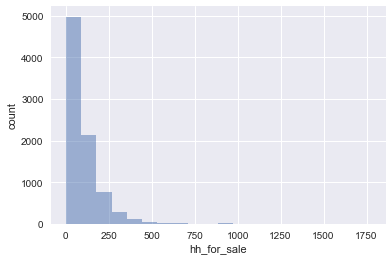

In [167]:
#due to scraping/movoto website, these features are missing as well. 
#We shouldn't delete because then we would lose all of the info stored in the other features. 
print("hh_for_sale missing values: ", df3[df3['hh_for_sale'].str.contains('—')].shape[0])
print("med_list_price missing values: ", df3[df3['med_list_price'].str.contains('—')].shape[0])

#we have to imput these values by either mean, median, or mode.
x = []
for i in df3['hh_for_sale']:
    if i != '—':
        x.append(float(str(i).replace(',','')))
print("mean:", round(np.mean(x),2))  
print("median:", np.median(x))

#df3[['room9over']] = df3[['room9over']].replace('%','',regex=True).astype(float)
#df3[['room9over']] = df3[['room9over']].replace('%','',regex=True).astype(float)
plt.hist(x, bins=20, alpha = 0.5)
plt.xlabel("hh_for_sale")
plt.ylabel("count")

#we will perform median imputation, since there is a heavy skew
df3[['hh_for_sale']] = df3[['hh_for_sale']].replace('—',np.median(x))

med_hh_size missing values:  121
mean: 1990.68
median: 1944.0


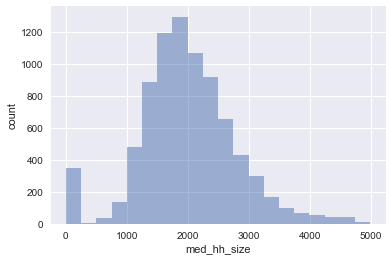

In [168]:
print("med_hh_size missing values: ", df3[df3['med_hh_size'].str.contains('—')].shape[0])

x = []
for i in df3['med_hh_size']:
    if i != '—' and float(str(i).replace(',','')) < 5000:
        x.append(float(str(i).replace(',','')))
print("mean:", round(np.mean(x),2))  
print("median:", np.median(x))

plt.hist(x, bins=20, alpha = 0.5)
plt.xlabel("med_hh_size")
plt.ylabel("count")

df3[['med_hh_size']] = df3[['med_hh_size']].replace('—',np.median(x))

mean: 366065.95
median: 283990.0


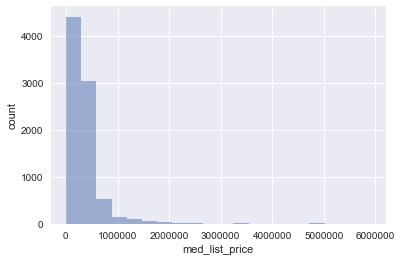

In [169]:
x = []
for i in df3['med_list_price']:
    if i != '$—':
        i = str(i).replace('$','')
        x.append(float(str(i).replace(',','')))
print("mean:", round(np.mean(x),2))  
print("median:", np.median(x))

plt.hist(x, bins=20, alpha = 0.5)
plt.xlabel("med_list_price")
plt.ylabel("count")

df3[['med_list_price']] = df3[['med_list_price']].replace('$—',np.median(x))

In [170]:
#convert features to float (remove % sign)
df3[['emp_oth']] = df3[['emp_oth']].replace('%','',regex=True).astype(float)
df3[['edu_HS']] = df3[['edu_HS']].replace('%','',regex=True).astype(float)
df3[['emp_agr']] = df3[['emp_agr']].replace('%','',regex=True).astype(float)
df3[['emp_info']] = df3[['emp_info']].replace('%','',regex=True).astype(float)
df3[['tp_oth']] = df3[['tp_oth']].replace('%','',regex=True).astype(float)
df3[['hh_size_1']] = df3[['hh_size_1']].replace('%','',regex=True).astype(float)
df3[['inc_75to150']] = df3[['inc_75to150']].replace('%','',regex=True).astype(float)
df3[['yr90']] = df3[['yr90']].replace('%','',regex=True).astype(float)
df3[['emp_ret']] = df3[['emp_ret']].replace('%','',regex=True).astype(float)
df3[['age25_39']] = df3[['age25_39']].replace('%','',regex=True).astype(float)
df3[['age18_24']] = df3[['age18_24']].replace('%','',regex=True).astype(float)
df3[['rec_home_sold']] = df3[['rec_home_sold']].replace('%','',regex=True).astype(float)
df3[['br5']] = df3[['br5']].replace('%','',regex=True).astype(float)
df3[['br1']] = df3[['br1']].replace('%','',regex=True).astype(float)
df3[['owner']] = df3[['owner']].replace('%','',regex=True).astype(float)
df3[['emp_manu']] = df3[['emp_manu']].replace('%','',regex=True).astype(float)
df3[['yr50under']] = df3[['yr50under']].replace('%','',regex=True).astype(float)
df3[['tp_pub']] = df3[['tp_pub']].replace('%','',regex=True).astype(float)
df3[['age_40_64']] = df3[['age_40_64']].replace('%','',regex=True).astype(float)
df3[['hh_for_sale']] = df3[['hh_for_sale']].replace(',','',regex=True).astype(float)
df3[['age_9under']] = df3[['age_9under']].replace('%','',regex=True).astype(float)
df3[['rent_600under']] = df3[['rent_600under']].replace('%','',regex=True).astype(float)
df3[['br0']] = df3[['br0']].replace('%','',regex=True).astype(float)
df3[['tp_taxi']] = df3[['tp_taxi']].replace('%','',regex=True).astype(float)
df3[['tp_taxi']] = df3[['tp_taxi']].replace('%','',regex=True).astype(float)
df3[['status_nlf']] = df3[['status_nlf']].replace('%','',regex=True).astype(float)
df3[['status_unemp']] = df3[['status_unemp']].replace('%','',regex=True).astype(float)
df3[['tp_wb']] = df3[['tp_wb']].replace('%','',regex=True).astype(float)
df3[['inc_30under']] = df3[['inc_30under']].replace('%','',regex=True).astype(float)
df3[['inc_30to75']] = df3[['inc_30to75']].replace('%','',regex=True).astype(float)
df3[['rent_600_1k']] = df3[['rent_600_1k']].replace('%','',regex=True).astype(float)
df3[['edu_ba']] = df3[['edu_ba']].replace('%','',regex=True).astype(float)
df3[['br4']] = df3[['br4']].replace('%','',regex=True).astype(float)
df3[['inc_150over']] = df3[['inc_150over']].replace('%','',regex=True).astype(float)
df3[['emp_cons']] = df3[['emp_cons']].replace('%','',regex=True).astype(float)
df3[['renter']] = df3[['renter']].replace('%','',regex=True).astype(float)
df3[['yr50_89']] = df3[['yr50_89']].replace('%','',regex=True).astype(float)
df3[['rent_1500_2k']] = df3[['rent_1500_2k']].replace('%','',regex=True).astype(float)
df3[['emp_pub']] = df3[['emp_pub']].replace('%','',regex=True).astype(float)
df3[['age_10_17']] = df3[['age_10_17']].replace('%','',regex=True).astype(float)
df3[['room1']] = df3[['room1']].replace('%','',regex=True).astype(float)
df3[['rent_1k_1.5k']] = df3[['rent_1k_1.5k']].replace('%','',regex=True).astype(float)
df3[['edu_lessHS']] = df3[['edu_lessHS']].replace('%','',regex=True).astype(float)
df3[['emp_edu']] = df3[['emp_edu']].replace('%','',regex=True).astype(float)
df3[['room7_8']] = df3[['room7_8']].replace('%','',regex=True).astype(float)
df3[['room4_6']] = df3[['room4_6']].replace('%','',regex=True).astype(float)
df3[['hh_size_6over']] = df3[['hh_size_6over']].replace('%','',regex=True).astype(float)
df3[['hh_size_4to5']] = df3[['hh_size_4to5']].replace('%','',regex=True).astype(float)
df3[['room9over']] = df3[['room9over']].replace('%','',regex=True).astype(float)
df3[['emp_trans']] = df3[['emp_trans']].replace('%','',regex=True).astype(float)
df3[['edu_grad']] = df3[['edu_grad']].replace('%','',regex=True).astype(float)
df3[['emp_prof']] = df3[['emp_prof']].replace('%','',regex=True).astype(float)
df3[['age_65over']] = df3[['age_65over']].replace('%','',regex=True).astype(float)
df3[['emp_fin']] = df3[['emp_fin']].replace('%','',regex=True).astype(float)
df3[['emp_art']] = df3[['emp_art']].replace('%','',regex=True).astype(float)
df3[['rent_2k_over']] = df3[['rent_2k_over']].replace('%','',regex=True).astype(float)
df3[['tp_priv']] = df3[['tp_priv']].replace('%','',regex=True).astype(float)
df3[['br3']] = df3[['br3']].replace('%','',regex=True).astype(float)
df3[['status_eciv']] = df3[['status_eciv']].replace('%','',regex=True).astype(float)
df3[['hh_size_2to3']] = df3[['hh_size_2to3']].replace('%','',regex=True).astype(float)
df3[['pop_edu']] = df3[['pop_edu']].replace('%','',regex=True).astype(float)
df3[['room2_3']] = df3[['room2_3']].replace('%','',regex=True).astype(float)
df3[['status_earm']] = df3[['status_earm']].replace('%','',regex=True).astype(float)
df3[['br2']] = df3[['br2']].replace('%','',regex=True).astype(float)
df3[['med_hh_size']] = df3[['med_hh_size']].replace(',','',regex=True).astype(float)
df3[['tp_wfh']] = df3[['tp_wfh']].replace('%','',regex=True).astype(float)
df3[['med_list_price']] = df3[['med_list_price']].replace('\$','',regex=True).replace(',','',regex=True).astype(float)

In [171]:
#transform total area (remove SF)
x1 = []
for i in df3['tot_area']:
    if len(i) < 2 :
        i = i.replace(' ','0')
        x1.append(str(i))
    else:
        i = i[:-3].replace(',','')
        x1.append(str(i).replace(',',''))
        
x1 = list(map(float, x1))
df3['tot_area'] = x1

In [172]:
print("instances with no. of stories listed: ", df3[df3['num_stories'] != ' '].shape[0], '\nratio: ', round(df3[df3['num_stories'] != ' '].shape[0] / df3.shape[0],2))

instances with no. of stories listed:  2865 
ratio:  0.34


In [173]:
#transform number of stories to a float
x2 = []
#should we replace number of stories with 0?
for i in df3['num_stories']:
    if len(i) < 2 :
        i = i.replace(' ','0')
        x2.append(str(i))
    else:
        x2.append(str(i).replace(',',''))
        
x2 = list(map(float,x2))
df3['num_stories'] = x2

In [174]:
#LabelEncode categorical variables like year
df3['year'] = df3['year'].astype(str)

from sklearn.preprocessing import LabelEncoder
cols = ('year')

lbl = LabelEncoder() 
lbl.fit(df3['year'].values) 
df3[c] = lbl.transform(df3['year'].values)

# shape        
print('Shape all_data: {}'.format(df3.shape))

Shape all_data: (8485, 80)


In [175]:
#df3[['med_dolSF']].astype(float)

#transform med_dolSF to a float
x3 = []
#should we replace NaN med_dolSF with median?
for i in df3['med_dolSF']:
    #if len(i) < 2 :
    #    i = i.replace(' ','0')
    #    x2.append(str(i))
    #if:
    x3.append(str(i).replace(',',''))
        
x3 = list(map(float,x3))
x3
df3['med_dolSF'] = x3


In [178]:
#we replace NaN's with the median median dollar per SF
df3["med_dolSF"] = df3["med_dolSF"].fillna(df3["med_dolSF"].median())

med_dolSF mean:  med_dolSF    16.961344
dtype: float64
med_dolSF median:  med_dolSF    13.0
dtype: float64


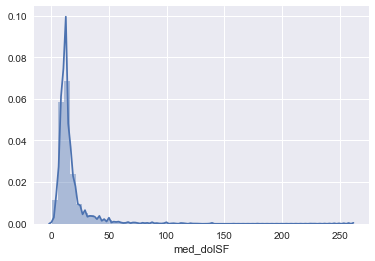

In [179]:
#we change to median due to the large skew and outliers. 
sns.distplot(df3['med_dolSF'])
print("med_dolSF mean: ", df3[["med_dolSF"]].mean())
print("med_dolSF median: ", df3[["med_dolSF"]].median())

In [350]:
df3.head()
#We find transform range values to the average of range in med_dolSF. 
#Then convert all AC to SF (note: 43560 SF in an acre)
lot_size_range = []
for i in df3['lot_size']:
    i = i.replace(',','')
    if len(i) < 2:
        i = 0
        lot_size_range.append(str(i))
    elif "-" in i:
        unit = i[-2:]
        i = i[:-3]
        x = i.find("-")
        i = str((float(i[:x-1]) + float(i[x+2:]))/2) + ' ' + unit
        if i[-2:] == 'AC':
            i = float(i[:-3]) * 43560
            lot_size_range.append(str(i))
        elif i[-2] == 'SF':
            #i = float(i[:-3])
            lot_size_range.append(str(i))
    elif i[-2:] == 'AC':
        i = float(i[:-3]) * 43560
        lot_size_range.append(str(i))
    elif i[-2:] == 'SF':
        i = float(i[:-3])
        lot_size_range.append(str(i))
df3['lot_size'].shape
len(lot_size_range)

(8485,)

In [333]:
df3['lot_size'][:4000]

0            680,276 SF
1               3.26 AC
2               1.09 AC
3                 25 AC
4             81,893 SF
5            119,354 SF
7            306,426 SF
8                      
9              11.67 SF
10            91,116 SF
11            40,903 SF
12           304,921 SF
13             27.18 AC
14           133,907 SF
15           149,969 SF
16           171,227 SF
17             5,592 AC
18                57 AC
19           328,876 SF
20            37,462 SF
21              0.37 AC
22            32,318 SF
24           157,455 SF
25             15.34 AC
26            69,737 SF
27              3.05 AC
28                94 AC
29      205 - 35,000 AC
30            68,825 SF
31             14.92 AC
32               350 AC
33              4.81 AC
34         1,132,560 SF
35              9.50 AC
36              8.43 AC
37                 5 AC
38             19.15 AC
39            60,750 SF
40             1,730 AC
41              7.84 AC
42                     
43             4

In [203]:
#what do we do with the rows with ranges as a value (i.e. 4.73 - 9.79 AC)
print("instances in lot_size with a range as value: ", df3[df3['lot_size'].str.contains("-") == True].shape[0], "\n ratio:", round(df3[df3['lot_size'].str.contains("-") == True].shape[0] / df3.shape[0],2))


instances in lot_size with a range as value:  343 
 ratio: 0.04


In [276]:
len(df3[['lot_size']][7:8])

1

In [285]:
lot_size_range

In [188]:
df3[['lot_size']]

lot_size
0           680,276 SF
1              3.26 AC
2              1.09 AC
3                25 AC
4            81,893 SF
5           119,354 SF
7           306,426 SF
8                     
9             11.67 SF
10           91,116 SF
11           40,903 SF
12          304,921 SF
13            27.18 AC
14          133,907 SF
15          149,969 SF
16          171,227 SF
17            5,592 AC
18               57 AC
19          328,876 SF
20           37,462 SF
21             0.37 AC
22           32,318 SF
24          157,455 SF
25            15.34 AC
26           69,737 SF
27             3.05 AC
28               94 AC
29     205 - 35,000 AC
30           68,825 SF
31            14.92 AC
32              350 AC
33             4.81 AC
34        1,132,560 SF
35             9.50 AC
36             8.43 AC
37                5 AC
38            19.15 AC
39           60,750 SF
40            1,730 AC
41             7.84 AC
42                    
43            43.26 AC
44                9 AC
45             4.60 AC
46             6.01 AC
47             6.45 AC
48            58.40 AC
49           56,000 SF
50            1,394 AC
51                    
52             9.40 AC
53                    
54               34 AC
55           39,370 SF
56              317 AC
57               20 AC
58                    
59         1,368.81 AC
60            11.50 AC
61               24 AC
62               81 AC
63                    
64             1.95 AC
65                    
66             5.61 AC
67          170,755 SF
68             1.39 AC
69             1.44 AC
70          440,000 SF
71               41 AC
72              221 AC
73             8.39 AC
74               31 AC
75              237 AC
76             8.80 AC
77             1.49 AC
78               19 AC
79                    
80               10 AC
81                7 AC
82            10.12 AC
83                    
84            24.67 AC
85              443 AC
86          218,671 SF
87                2 AC
88              150 AC
89              381 AC
90            27.81 AC
91            23.96 AC
92             6.08 SF
93             7.57 AC
94             7.33 AC
95             1.06 SF
96           42,253 SF
97               11 AC
98         50 - 317 AC
99            39.98 AC
100           13.46 AC
101           26.50 AC
102              59 AC
103          555.12 AC
104         696,960 SF
105          48,141 SF
106            0.25 AC
107                   
108           10.39 AC
109            5.27 AC
110           24.10 AC
111             446 AC
112             430 AC
113            5.90 AC
114              22 AC
115            5.75 AC
116             385 AC
117               5 AC
118              13 AC
119                   
120            1.80 AC
121           36.73 AC
122           54.82 AC
123             177 AC
125             325 AC
126                   
127           17.15 AC
128          83,000 SF
129                   
130           14.77 AC
131             427 AC
132           19.51 AC
133                   
134              86 AC
135                   
136            2.80 AC
137            4.02 AC
138             811 AC
139              94 AC
140           56.17 AC
141               9 AC
142              10 AC
143             336 AC
144           16.32 AC
145            3.91 AC
146             138 AC
147         947,212 SF
148           16.80 AC
149                   
150           10.40 AC
151           43.69 AC
152                   
153                   
154            7.34 AC
156             200 AC
157            4.23 AC
158            4.03 AC
159           23.92 AC
160             139 AC
161     4.73 - 9.79 AC
162           53.53 AC
163            9.58 AC
164            1.87 AC
165            4.58 AC
166       1 - 12.69 AC
167       1 - 29.42 AC
168           17.44 AC
169           14.32 AC
170           11.50 AC
171              35 AC
172               7 AC
173                   
174           13.93 AC
175            3.77 AC
176           17.74 AC
177        1

### EDA
- look at price distribution
- look at different types of property
- look at scatter matrix plot

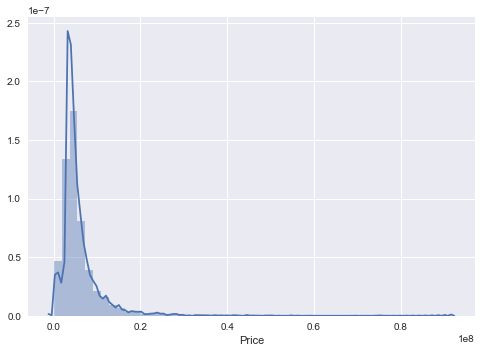

In [35]:
#price has a skewed distribution, we will take the logarithm of it
sns.distplot(df3['Price'])

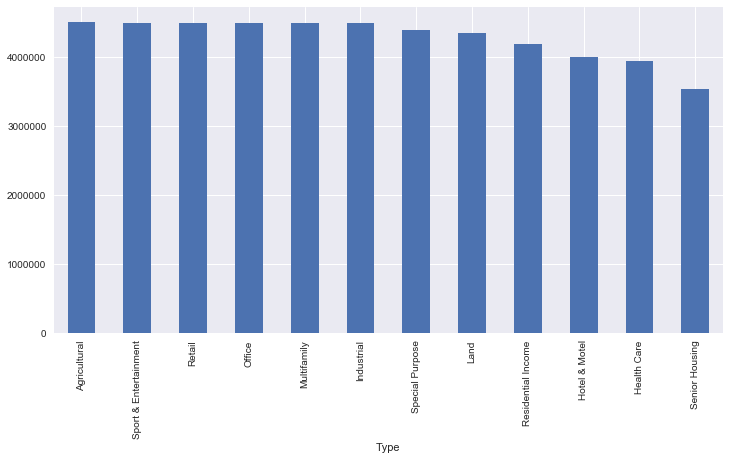

In [36]:
plt.figure(figsize=(12,6)) #.agg("count")
df3.groupby('Type')['Price'].median().sort_values(ascending=False).plot.bar()

Type
Land                     0.336712
Retail                   0.251738
Industrial               0.138715
Office                   0.121626
Multifamily              0.068474
Hotel & Motel            0.031821
Special Purpose          0.021921
Agricultural             0.016971
Residential Income       0.005186
Senior Housing           0.003182
Sport & Entertainment    0.002711
Health Care              0.000943
Name: Price, dtype: float64


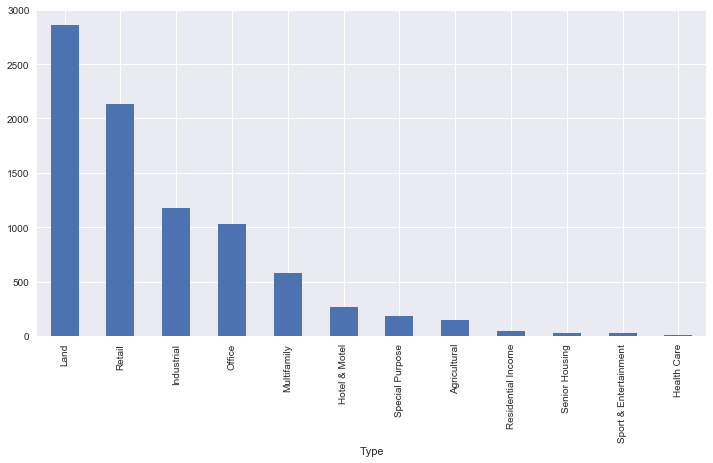

In [37]:
#we look at volume/frequency
print(df3.groupby('Type',)['Price'].agg("count").sort_values(ascending=False)/sum(df3.groupby('Type',)['Price'].agg("count")))
plt.figure(figsize=(12,6))
df3.groupby('Type',)['Price'].agg("count").sort_values(ascending=False).plot.bar()

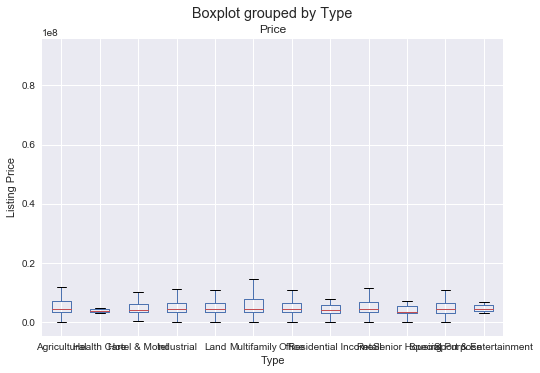

In [38]:
df_score = df3[['Type', 'Price']]
df_score.boxplot(by='Type', column='Price')
plt.ylabel('Listing Price')

In [39]:
#2 categorical variables
df3.describe()

Price      tot_area      emp_oth       edu_HS      emp_agr  \
count  8.485000e+03  8.485000e+03  8485.000000  8485.000000  8485.000000   
mean   5.905014e+06  3.072267e+04     4.847095    48.061603     1.864042   
std    5.629471e+06  8.453661e+04     1.570818    10.865744     4.414877   
min    8.499000e+03  0.000000e+00     0.000000     0.000000     0.000000   
25%    3.402769e+06  0.000000e+00     3.900000    41.500000     0.200000   
50%    4.495000e+06  5.069000e+03     4.700000    49.900000     0.600000   
75%    6.525000e+06  3.244600e+04     5.700000    56.000000     1.700000   
max    9.116890e+07  3.495000e+06    24.000000   100.000000    89.800000   

          emp_info    med_hh_size       tp_oth    hh_size_1  inc_75to150  \
count  8485.000000    8485.000000  8485.000000  8485.000000  8485.000000   
mean      2.134720    2230.463877     1.114414    28.075887    25.903606   
std       1.537555    5480.583573     1.178156     9.625362     8.816027   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       1.300000    1540.000000     0.500000    21.700000    19.600000   
50%       1.900000    1944.000000     0.900000    27.200000    26.000000   
75%       2.600000    2444.000000     1.400000    32.700000    32.300000   
max      18.600000  212399.000000    54.800000   100.000000   100.000000   

              yr90      emp_ret     age25_39     age18_24  rec_home_sold  \
count  8485.000000  8485.000000  8485.000000  8485.000000    8485.000000   
mean     36.214567    14.468250    20.446777     9.948238       2.123276   
std      22.265746     3.310937     5.554184     5.868365       4.008669   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%      18.400000    12.600000    17.200000     7.300000       0.000000   
50%      32.600000    14.500000    20.000000     8.800000       1.000000   
75%      50.600000    16.300000    22.800000    10.700000       2.000000   
max     100.000000    49.500000    55.800000    92.800000      41.000000   

               br5          br1        owner     emp_manu    yr50under  \
count  8485.000000  8485.000000  8485.000000  8485.000000  8485.000000   
mean      4.845516    11.361237    62.416005     9.429252    14.798774   
std       4.941076     9.330128    17.637303     5.701283    16.868207   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.900000     5.200000    52.500000     5.200000     2.500000   
50%       3.500000     8.900000    65.500000     8.400000     8.400000   
75%       6.000000    14.100000    74.900000    12.500000    20.700000   
max      66.700000    80.000000   100.000000    51.800000    85.300000   

            tp_pub    age_40_64  hh_for_sale   age_9under  rent_600under  \
count  8485.000000  8485.000000  8485.000000  8485.000000    8466.000000   
mean      4.713848    32.659316    95.435592    12.660978      28.798795   
std      10.702876     5.179066   111.343062     3.465170      22.978724   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.300000    29.900000    22.000000    10.700000      10.100000   
50%       1.200000    32.900000    69.000000    12.600000      22.900000   
75%       3.800000    35.700000   132.000000    14.800000      43.000000   
max      75.400000   100.000000  1772.000000    45.700000     100.000000   

               br0      tp_taxi   status_nlf  status_unemp        tp_wb  \
count  8485.000000  8485.000000  8485.000000   8485.000000  8485.000000   
mean      2.495887     0.135050    35.177419      5.047613     3.716618   
std       4.179140     0.442097     8.049684      2.206219     5.678889   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.600000     0.000000    30.100000      3.600000     1.000000   
50%       1.400000     0.000000    34.000000      4.700000     1.900000   
75%       2.700000     0.100000    39.100000      6.100000     3.800000   
max    

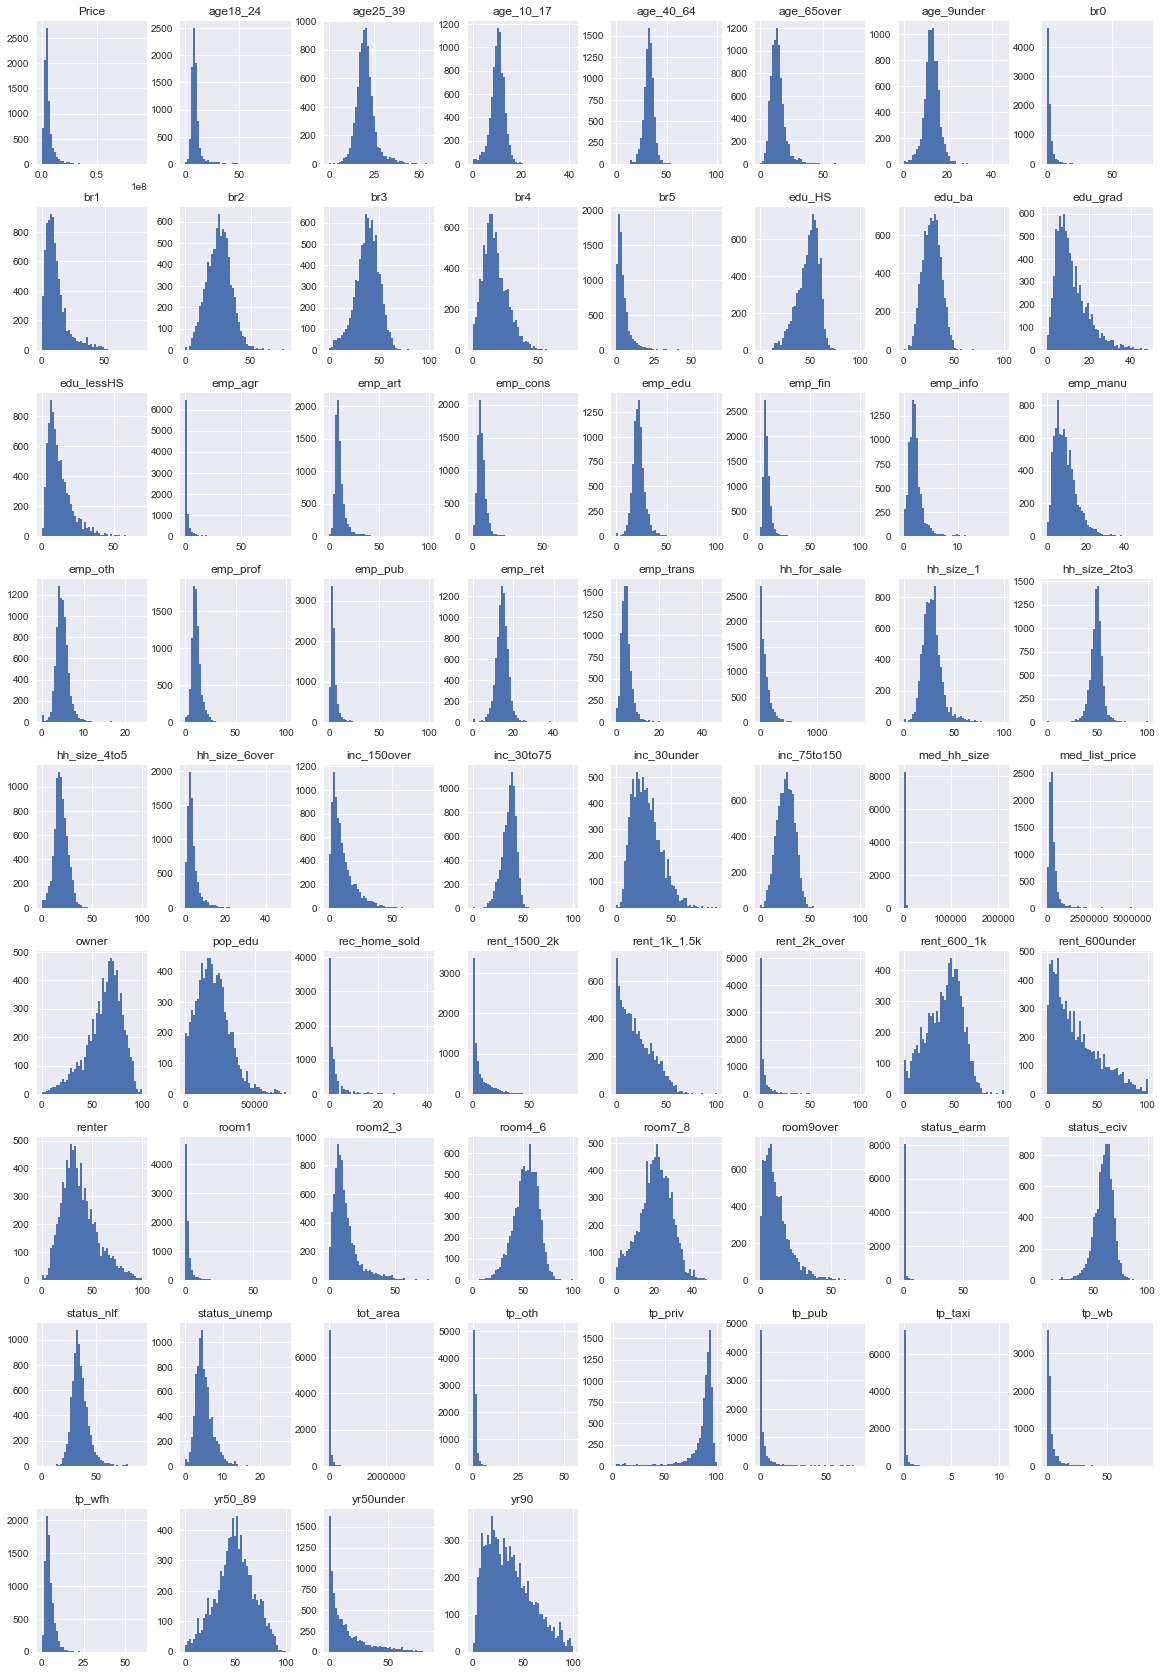

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
df3.hist(bins=50, figsize=(20,30))
plt.show()

In [41]:
corr_matrix = df3.corr()
corr_matrix

Price  tot_area   emp_oth    edu_HS   emp_agr  emp_info  \
Price           1.000000  0.180147 -0.031617 -0.075423 -0.050581  0.080023   
tot_area        0.180147  1.000000 -0.009049  0.050104 -0.019975 -0.037329   
emp_oth        -0.031617 -0.009049  1.000000  0.098427 -0.078504 -0.038775   
edu_HS         -0.075423  0.050104  0.098427  1.000000  0.196078 -0.468518   
emp_agr        -0.050581 -0.019975 -0.078504  0.196078  1.000000 -0.177067   
emp_info        0.080023 -0.037329 -0.038775 -0.468518 -0.177067  1.000000   
med_hh_size     0.035729 -0.022193 -0.041899 -0.011178  0.016427 -0.011422   
tp_oth         -0.039168 -0.034901  0.019773  0.068297  0.077701 -0.056486   
hh_size_1       0.000753  0.067765  0.024783 -0.123328 -0.097924  0.185977   
inc_75to150     0.043955 -0.074920 -0.171869 -0.249612 -0.028463  0.155815   
yr90           -0.003833 -0.105884 -0.137801 -0.029761  0.031628 -0.050318   
emp_ret        -0.024039 -0.002446  0.020038  0.305982 -0.135703 -0.184598   
age25_39        0.056108  0.010177  0.054055 -0.251691 -0.083047  0.319614   
age18_24       -0.006601  0.036779 -0.006876 -0.070943 -0.047833 -0.060257   
rec_home_sold   0.003965 -0.022147 -0.002506 -0.027753 -0.088281  0.046013   
br5             0.044506 -0.054871 -0.119066 -0.234933  0.015522  0.086655   
br1             0.060526  0.025151  0.099162 -0.324559 -0.100859  0.322169   
owner          -0.044234 -0.045506 -0.161923  0.138589  0.105504 -0.168458   
emp_manu        0.019960  0.098030 -0.063506  0.195436 -0.110544 -0.177386   
yr50under       0.052688  0.101850  0.057436 -0.100316 -0.031601  0.167824   
tp_pub          0.106019 -0.004423  0.095801 -0.296268 -0.113913  0.331289   
age_40_64       0.001037 -0.011425 -0.049860  0.009193  0.001844  0.031823   
hh_for_sale    -0.010053 -0.042830 -0.028026 -0.137500 -0.099933  0.045622   
age_9under     -0.010310 -0.007944  0.043808  0.183834  0.030480 -0.126347   
rent_600under  -0.055477  0.101951  0.045906  0.459846  0.233546 -0.297011   
br0             0.060017  0.004704  0.065249 -0.233416 -0.033839  0.264724   
tp_taxi         0.076663 -0.012647  0.000678 -0.210007 -0.070635  0.246291   
status_nlf     -0.051673  0.011429  0.084545  0.300160  0.090161 -0.281691   
status_unemp   -0.002668  0.067550  0.168040  0.265922 -0.122404 -0.063378   
tp_wb           0.067688  0.030017  0.010299 -0.313318  0.022919  0.220854   
inc_30under    -0.050643  0.086140  0.200364  0.335528  0.027100 -0.213023   
inc_30to75     -0.056578  0.023242  0.112698  0.595365  0.093788 -0.312049   
rent_600_1k    -0.059292 -0.016443  0.012355  0.220901 -0.053586 -0.200659   
edu_ba          0.058551 -0.061101 -0.208673 -0.727317 -0.171951  0.427358   
br4             0.009531 -0.055821 -0.170450 -0.207644 -0.039920 -0.006115   
inc_150over     0.072463 -0.064956 -0.200189 -0.696007 -0.084443  0.391945   
emp_cons       -0.071392 -0.032365  0.165486  0.354842  0.141492 -0.263238   
renter          0.044233  0.045507  0.161917 -0.138591 -0.105502  0.168457   
yr50_89        -0.043502  0.034653  0.113805  0.127730 -0.009246 -0.092787   
rent_1500_2k    0.073516 -0.061788 -0.042198 -0.472283 -0.119964  0.346895   
emp_pub        -0.031858 -0.023394 -0.026818  0.163694  0.022234 -0.111352   
age_10_17      -0.016225 -0.008731 -0.030721  0.171269  0.061115 -0.186487   
room1           0.055572  0.003625  0.057811 -0.211528 -0.030740  0.238063   
rent_1k_1.5k    0.056605 -0.077058 -0.010878 -0.374108 -0.157005  0.227775   
edu_lessHS     -0.027166  0.037796  0.278401  0.253277  0.106468 -0.231147   
emp_edu        -0.017467  0.042994 -0.131725 -0.173048 -0.157201 -0.034358   
room7_8        -0.015335 -0.009774 -0.164607  0.035177 -0.018050 -0.097400   
room4_6        -0.081432  0.029718  0.139872  0.540903  0.118506 -0.314235   
hh_size_6over   0.027012 -0.031960  0.108413  0.143560  0.065706 -0.146281   
hh_size_4to5    0.020933 -0.040473 -0.001405  0.008495 -0.022827 -0.091123   
room9over       0.025767 -0.033990 -0.179

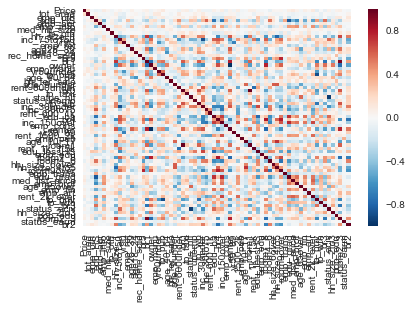

In [42]:
import seaborn as sns
corr = df3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [43]:
#correlation seems to be low -- we will transform and check again soon
top_corr = np.abs(corr_matrix['Price']).sort_values(ascending=False).head(n=20)
top_corr

Price             1.000000
tot_area          0.180147
med_list_price    0.108098
tp_pub            0.106019
tp_priv           0.103131
rent_2k_over      0.094858
room4_6           0.081432
emp_info          0.080023
tp_taxi           0.076663
edu_HS            0.075423
br3               0.074907
rent_1500_2k      0.073516
inc_150over       0.072463
emp_cons          0.071392
emp_fin           0.069256
edu_grad          0.068809
room2_3           0.068006
tp_wb             0.067688
br1               0.060526
br0               0.060017
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e89e358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1284b3320>]], dtype=object)

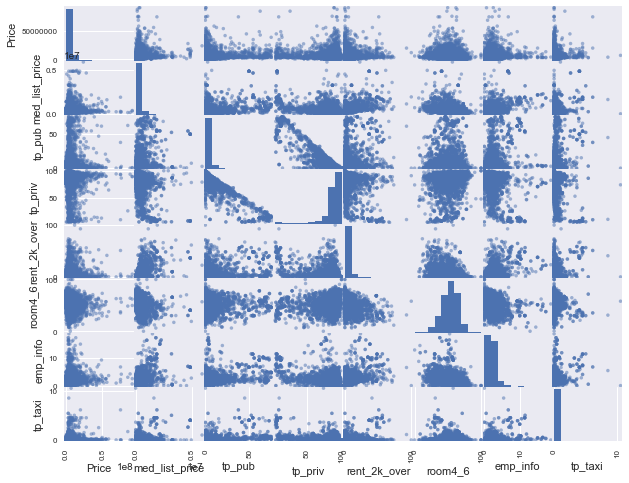

In [44]:
#closer look at top 7 correlations
from pandas.tools.plotting import scatter_matrix

attributes = ["Price","med_list_price", "tp_pub", "tp_priv","rent_2k_over","room4_6","emp_info","tp_taxi"]
scatter_matrix(df3[attributes], figsize = (10,8), alpha = 0.5)

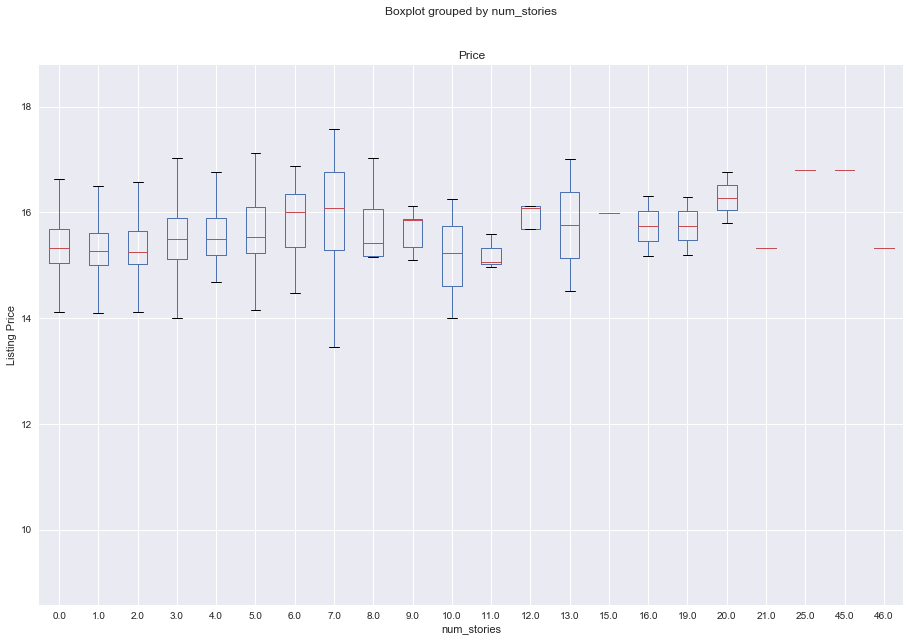

In [105]:
#looks like more units generally means higher listing price
df_score = df3[['num_stories', 'Price']]
df_score.boxplot(by='num_stories', column='Price', figsize = (15,10))
plt.ylabel('Listing Price')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

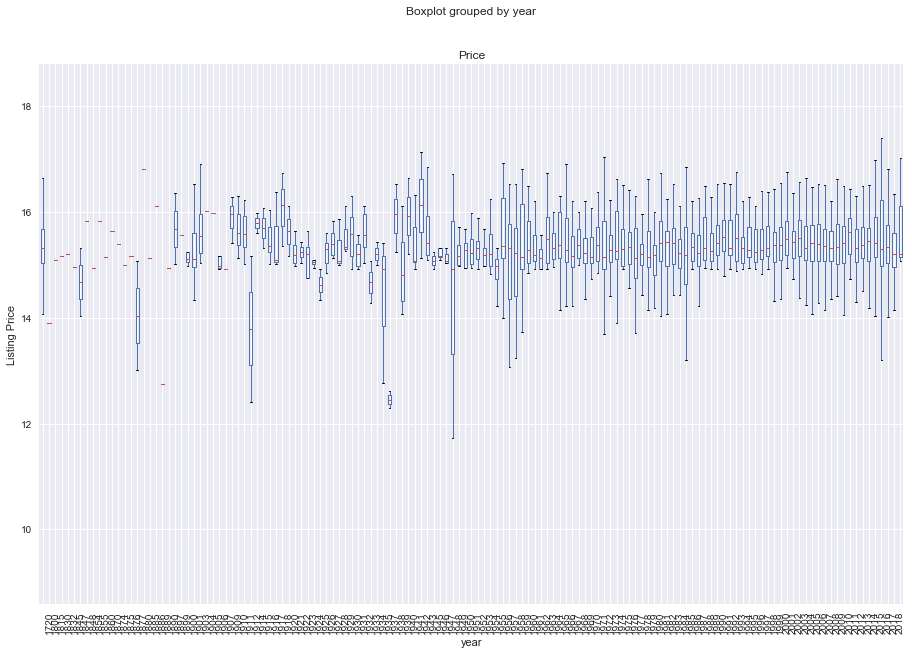

In [119]:
#looks like there is a cyclical cycle
df_score = df3[['year', 'Price']]
df_score.boxplot(by='year', column='Price', figsize = (15,10))
plt.ylabel('Listing Price')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

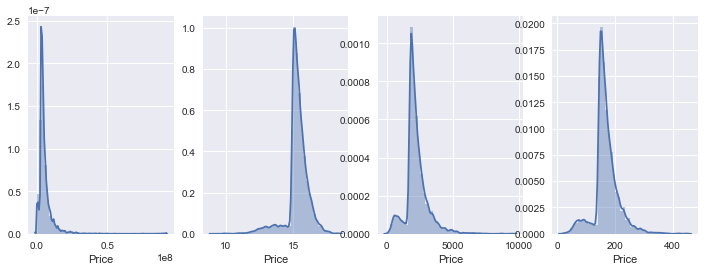

In [45]:
#we look at various transformations. It looks like logging is the best
fig, axs = plt.subplots(1,4)
fig.set_size_inches(12, 4)
sns.distplot(df3['Price'], ax=axs[0])
sns.distplot(np.log1p(df3['Price']), ax=axs[1])
sns.distplot(np.sqrt(df3['Price']), ax=axs[2])
sns.distplot((df3['Price']**(1/3)), ax=axs[3])

In [46]:
#checkpoint 3
df3.to_csv('zipcode_demographics3.csv')#reload dataframe

In [47]:
df3 = pd.read_csv("zipcode_demographics3.csv")
df3.drop(['Unnamed: 0'], axis=1, inplace=True)

In [48]:
df3['Price'] = np.log1p(df3['Price'])

In [106]:
#looks like correlation starts to jump but not a huge jump
corr_matrix = df3.corr()
top_corr = np.abs(corr_matrix['Price']).sort_values(ascending=False).head(n=20)
top_corr

Price             1.000000
tot_area          0.166349
room4_6           0.162839
emp_cons          0.139679
status_nlf        0.135525
emp_agr           0.132268
status_eciv       0.125339
edu_grad          0.123784
edu_ba            0.123560
med_list_price    0.120123
inc_150over       0.119792
emp_info          0.119133
tp_pub            0.117717
edu_HS            0.116317
rent_1500_2k      0.113446
rent_2k_over      0.108950
inc_30under       0.107719
tp_priv           0.105639
emp_manu          0.105048
inc_75to150       0.099585
Name: Price, dtype: float64

In [107]:
corr_matrix[:1]

Price  tot_area  num_stories  zip_code   emp_oth    edu_HS   emp_agr  \
Price    1.0  0.166349     0.056009 -0.033537 -0.072758 -0.116317 -0.132268   

       emp_info  med_hh_size    tp_oth  hh_size_1  inc_75to150      yr90  \
Price  0.119133     0.030308 -0.096429  -0.006082     0.099585  0.003456   

        emp_ret  age25_39  age18_24  rec_home_sold       br5      br1  \
Price -0.037146  0.081643 -0.000619       0.039198  0.090387  0.04675   

          owner  emp_manu  yr50under    tp_pub  age_40_64  hh_for_sale  \
Price -0.046942  0.105048   0.079541  0.117717    0.02396     -0.00553   

       age_9under  rent_600under       br0  tp_taxi  status_nlf  status_unemp  \
Price    0.005742      -0.093202  0.054535  0.07769   -0.135525      0.010952   

          tp_wb  inc_30under  inc_30to75  rent_600_1k   edu_ba       br4  \
Price  0.061317    -0.107719   -0.084614    -0.069227  0.12356  0.072394   

       inc_150over  emp_cons    renter   yr50_89  rent_1500_2k   emp_pub  \
Price     0.119792 -0.139679  0.046943 -0.076856      0.113446 -0.031972   

       age_10_17     room1  rent_1k_1.5k  edu_lessHS  emp_edu   room7_8  \
Price   0.000775  0.049715      0.093353   -0.092202  -0.0061  0.055699   

        room4_6  hh_size_6over  hh_size_4to5  room9over  emp_trans  edu_grad  \
Price -0.162839       0.015129      0.058169   0.098848  -0.051441  0.123784   

       med_list_price  emp_prof  age_65over   emp_fin   emp_art  rent_2k_over  \
Price        0.120123  0.082753   -0.097128  0.096836  0.006452       0.10895   

        tp_priv    tp_wfh       br3  status_eciv  hh_size_2to3   pop_edu  \
Price -0.105639  0.008444 -0.080672     0.125339     -0.060645  0.076649   

        room2_3  status_earm       br2  
Price  0.040999    -0.010029 -0.089385

### Model Selection

In [50]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [51]:
GBoost1 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.0465,
                                   max_depth=2, max_features='sqrt',
                                   min_samples_leaf=3, min_samples_split=18, 
                                   loss='huber', random_state = 5)

In [52]:
#we split train and test into 80/20 split
train = df3[:6788]
test = df3[6788:]

In [53]:
y_train = train.Price.values
train.drop(['Price'], axis=1, inplace=True)
train.drop(['Address'], axis=1, inplace=True)
train.drop(['broker'], axis=1, inplace=True)
train.drop(['broker2'], axis=1, inplace=True)
train.drop(['address'], axis=1, inplace=True)

y_test = test.Price.values
test.drop(['Price'], axis=1, inplace=True)
test.drop(['Address'], axis=1, inplace=True)
test.drop(['broker'], axis=1, inplace=True)
test.drop(['broker2'], axis=1, inplace=True)
test.drop(['address'], axis=1, inplace=True)

In [54]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [704]:
score = rmsle_cv(GBoost1)
print("Gradient Boosting1 score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: could not convert string to float: 'Multifamily'

In [ ]:
train = pd.get_dummies(train)
print(train.shape)

In [112]:
df3['year'].unique()

array([' ', '2006', '1978', '1983', '1982', '1977', '2001', '1996', '2015',
       '1980', '1953', '2008', '2014', '1974', '2010', '1999', '2004',
       '2016', '2000', '2007', '1989', '2012', '2009', '1984', '1995',
       '1961', '1976', '1992', '1968', '2005', '1972', '1950', '2002',
       '2003', '2011', '1979', '1970', '1963', '2017', '1964', '1998',
       '1917', '1966', '1971', '1946', '1960', '1981', '1965', '1986',
       '1985', '1994', '1990', '1931', '2018', '1987', '1949', '1958',
       '1940', '1948', '1997', '2013', '1962', '1988', '1920', '1915',
       '1973', '1975', '1969', '1922', '1927', '1991', '1955', '1952',
       '1907', '1939', '1910', '1929', '1890', '1923', '1911', '1954',
       '1967', '1957', '1925', '1912', '1909', '1914', '1956', '1938',
       '1848', '1930', '1959', '1937', '1921', '1900', '1945', '1993',
       '1951', '1934', '1928', '1901', '1947', '1935', '1924', '1845',
       '1916', '1880', '1899', '1875', '1847', '1874', '1889', '1876',
 

In [180]:
train.dtypes

tot_area          float64
num_stories        object
lot_size           object
Type               object
year               object
zip_code            int64
emp_oth           float64
edu_HS            float64
emp_agr           float64
emp_info          float64
med_hh_size       float64
tp_oth            float64
hh_size_1         float64
inc_75to150       float64
yr90              float64
emp_ret           float64
age25_39          float64
age18_24          float64
rec_home_sold     float64
br5               float64
br1               float64
owner             float64
emp_manu          float64
yr50under         float64
tp_pub            float64
age_40_64         float64
hh_for_sale       float64
age_9under        float64
rent_600under     float64
br0               float64
tp_taxi           float64
status_nlf        float64
status_unemp      float64
tp_wb             float64
inc_30under       float64
inc_30to75        float64
rent_600_1k       float64
edu_ba            float64
br4         

In [705]:
train

tot_area num_stories         lot_size                   Type  year  \
0          0.0                   680,276 SF                   Land         
1      10000.0           1          3.26 AC                 Office  2006   
2      28521.0                      1.09 AC                 Office         
3          0.0                        25 AC                   Land         
4          0.0           1        81,893 SF                 Retail  1978   
5      35962.0                   119,354 SF        Special Purpose         
6      37193.0                   306,426 SF                 Office         
7      24519.0                                       Hotel & Motel         
8      59240.0           1         11.67 SF             Industrial  1983   
9      28000.0           2        91,116 SF             Industrial  1982   
10     11900.0           2        40,903 SF                 Office  1977   
11     34092.0                   304,921 SF                 Office         
12         0.0                     27.18 AC                   Land         
13     25026.0                   133,907 SF             Industrial  2001   
14     41000.0                   149,969 SF                 Office         
15     79438.0                   171,227 SF                 Office         
16         0.0                     5,592 AC                   Land         
17     15000.0           2            57 AC          Hotel & Motel  1996   
18         0.0                   328,876 SF          Hotel & Motel         
19     17250.0           1        37,462 SF                 Retail  2015   
20     76600.0           7          0.37 AC                 Office  1980   
21     34931.0           2        32,318 SF            Multifamily  1953   
22     77000.0                   157,455 SF                 Office         
23    111348.0                     15.34 AC             Industrial  2008   
24     14418.0           1        69,737 SF                 Retail  2014   
25     39284.0                      3.05 AC                 Retail         
26         0.0                        94 AC           Agricultural         
27         0.0              205 - 35,000 AC                   Land         
28      5753.0           1        68,825 SF                 Retail  2006   
29         0.0                     14.92 AC                   Land         
30         0.0                       350 AC                   Land         
31         0.0           1          4.81 AC                 Retail         
32    327600.0           1     1,132,560 SF             Industrial         
33         0.0                      9.50 AC                   Land         
34    142040.0                      8.43 AC             Industrial  1974   
35         0.0                         5 AC                   Land         
36    252000.0                     19.15 AC             Industrial         
37     30000.0           3        60,750 SF          Hotel & Motel  2010   
38         0.0                     1,730 AC                   Land         
39     47287.0                      7.84 AC                 Retail         
40     46565.0                                              Office         
41         0.0                     43.26 AC                   Land         
42         0.0          13             9 AC          Hotel & Motel  2001   
43     48000.0           1          4.60 AC             Industrial  1999   
44     49588.0           1          6.01 AC                 Office  2004   
45     41921.0                      6.45 AC                 Retail  2016   
46         0.0                     58.40 AC                   Land         
47     48000.0                    56,000 SF                 Office         
48         0.0                     1,394 AC                   Land         
49         0.0                                          Industrial         
50    223500.0           1          9.40 AC             Industrial         
51     42200.0                                        

TypeError: invalid type comparison

Address      Price  tot_area  num_stories    lot_size  \
0  Anchorage, AK 99518 ·  16.141757       0.0          0.0  680,276 SF   
1  Fairbanks, AK 99701 ·  15.214228   10000.0          1.0     3.26 AC   
2  Anchorage, AK 99502 ·  15.068274   28521.0          0.0     1.09 AC   
3    Wasilla, AK 99654 ·  14.999383       0.0          0.0       25 AC   
4  Anchorage, AK 99504 ·  15.424949       0.0          1.0   81,893 SF   

     Type  year              broker broker2  zip_code  emp_oth  edu_HS  \
0    Land              Greg Johnson     NaN     99518      2.3    55.4   
1  Office  2006       Pamela Throop     NaN     99701      4.0    57.4   
2  Office              Vern Flowers     NaN     99502      4.3    54.0   
3    Land        Carl D. Kuhn, CCIM     NaN     99654      5.0    63.7   
4  Retail  1978          Doosan Bak     NaN     99504      4.4    55.3   

   emp_agr  emp_info  med_hh_size  tp_oth  hh_size_1  inc_75to150  yr90  \
0      4.3       1.9       1474.0     2.0       30.8         41.2  24.7   
1      1.8       1.0       1547.0     1.7       35.8         26.2  15.5   
2      3.0       2.6       1750.0     3.5       21.4         36.7  25.2   
3      5.8       2.5       2031.0     7.2       20.1         36.9  56.3   
4      1.7       1.9       1492.0     1.8       22.7         37.0  24.1   

   emp_ret  age25_39  age18_24  rec_home_sold  br5   br1  owner  emp_manu  \
0     11.9      26.8      10.7            4.0  2.2   5.5   64.4       1.7   
1     17.8      26.4      14.0            0.0  1.8  20.7   42.4       0.7   
2     13.7      24.9       9.1            3.0  5.8   5.5   64.4       1.6   
3     12.8      20.9       9.6            4.0  4.6   9.3   74.4       3.1   
4     13.9      22.5      11.8            0.0  2.2   6.3   64.4       1.7   

   yr50under  tp_pub  age_40_64  hh_for_sale  age_9under  rent_600under  br0  \
0        0.5     1.1       32.7         44.0        11.8            3.3  1.3   
1        9.0     1.8       26.9         19.0        13.9           10.4  5.3   
2        0.9     1.4       31.3        125.0        16.2            4.7  0.2   
3        0.7     1.2       32.7        303.0        15.5           10.1  3.1   
4        0.4     2.4       31.2        189.0        15.0           10.5  0.3   

   tp_taxi  status_nlf  status_unemp  tp_wb  inc_30under  inc_30to75  \
0      0.1        20.7           5.3    3.3          8.8        36.4   
1      0.8        29.8           7.4    6.0         26.0        40.5   
2      0.2        24.0           4.5    2.5         13.7        30.9   
3      0.0        35.7           6.4    1.7         18.2        31.9   
4      0.0        25.8           4.9    1.2         15.6        32.8   

   rent_600_1k  edu_ba   br4  inc_150over  emp_cons  renter  yr50_89  \
0         30.6    31.6   9.6         13.6       8.5    35.6     74.8   
1         46.5    24.4  11.9          7.3       5.9    57.6     75.5   
2         19.0    29.1  18.9         18.8       8.0    35.6     73.9   
3         43.2    22.5  17.0         13.0      13.0    25.6     43.0   
4         25.1    26.8  16.3         14.6       6.2    35.6     75.5   

   rent_1500_2k  emp_pub  age_10_17               address  room1  \
0          22.7      9.2        9.6  Anchorage, AK, 99518    0.9   
1          11.9      8.1        9.5  Fairbanks, AK, 99701    4.8   
2           8.1      9.8        9.2  Anchorage, AK, 99502    0.2   
3          11.7      9.3       13.2    Wasilla, AK, 99654    3.0   
4          18.9     10.6       10.9  Anchorage, AK, 99504    0.3   

   rent_1k_1.5k  edu_lessHS  emp_edu  room7_8  room4_6  hh_size_6over  \
0          42.4         5.9     20.3     13.1     68.6            4.6   
1          27.9        11.4     22.9     11.7     50.5            3.5   
2          63.7         5.3     20.8     25.2     53.6            3.2   
3          33.5         8.0     22.5     17.8     54.9            5.8   
4          43.3         7.0     24.5     18.4     65.1            5.6   

   hh_size_4to5  r

In [574]:
#we need to transform categorical variables
train.dtypes

tot_area           object
num_stories        object
lot_size           object
Type               object
year               object
zip_code            int64
emp_oth           float64
edu_HS            float64
emp_agr           float64
emp_info          float64
med_hh_size       float64
tp_oth            float64
hh_size_1         float64
inc_75to150       float64
yr90              float64
emp_ret           float64
age25_39          float64
age18_24          float64
rec_home_sold     float64
br5               float64
br1               float64
owner             float64
emp_manu          float64
yr50under         float64
tp_pub            float64
age_40_64         float64
hh_for_sale       float64
age_9under        float64
rent_600under     float64
br0               float64
tp_taxi           float64
status_nlf        float64
status_unemp      float64
tp_wb             float64
inc_30under       float64
inc_30to75        float64
rent_600_1k       float64
edu_ba            float64
br4         